# The objective of the analysis is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.
### The following processes was carried out<br />Libraries were loaded<br />The dataset was loaded using Pandas<br />Exploratoratory Data Analysis to understand the data set<br />Data Visualization<br />Data Modeling


In [5]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib Inline


In [6]:
# Load the dataset
diabetes_data = pd.read_csv("C:/Users/EGO/Desktop/MeriSkill/Project 2 - Diabetes Data/Project 2 MeriSKILL/diabetes.csv")

In [18]:
# Explore the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Summary statistics on dataset
print(diabetes_data.describe()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [20]:
#Check for missing 
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# Check data type
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


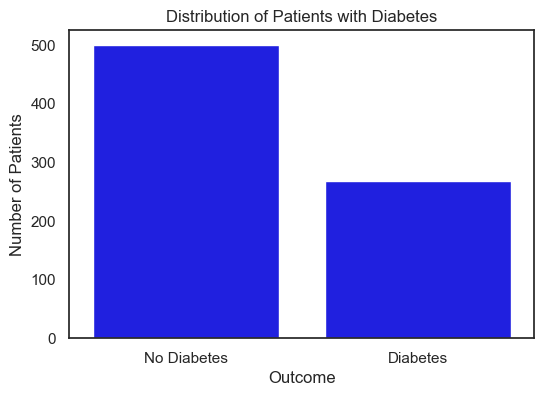

In [123]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Create a countplot for outcome using Seaborn
sns.set(style="white")
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=diabetes_data, color="blue")
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('Distribution of Patients with Diabetes')
plt.show()

In [113]:
# Split the data into independent variables (X) and the target variable (y)
X = diabetes_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = diabetes_data["Outcome"]

In [97]:
# Split the data into training and testing sets. 80% of the dataset is used for training and 20% for testing. Randomstate at 42 to ensure the split is reproducible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [98]:
# Check the test size
X_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,98,58,33,190,34.0,0.430,43
324,112,75,32,0,35.7,0.148,21
624,108,64,0,0,30.8,0.158,21
690,107,80,0,0,24.6,0.856,34
473,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...
619,119,0,0,0,32.4,0.141,24
198,109,64,44,99,34.8,0.905,26
538,127,80,37,210,36.3,0.804,23
329,105,70,32,68,30.8,0.122,37


In [99]:
model = LogisticRegression()

In [100]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [101]:
#Test the model
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [104]:
#Check accuracy
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [105]:
# Compare the actualand predicted classes of the data using confusion matrix
confusion_matrix(y_test, y_pred)

array([[124,  27],
       [ 33,  47]], dtype=int64)

In [107]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.81       151\n           1       0.64      0.59      0.61        80\n\n    accuracy                           0.74       231\n   macro avg       0.71      0.70      0.71       231\nweighted avg       0.74      0.74      0.74       231\n'

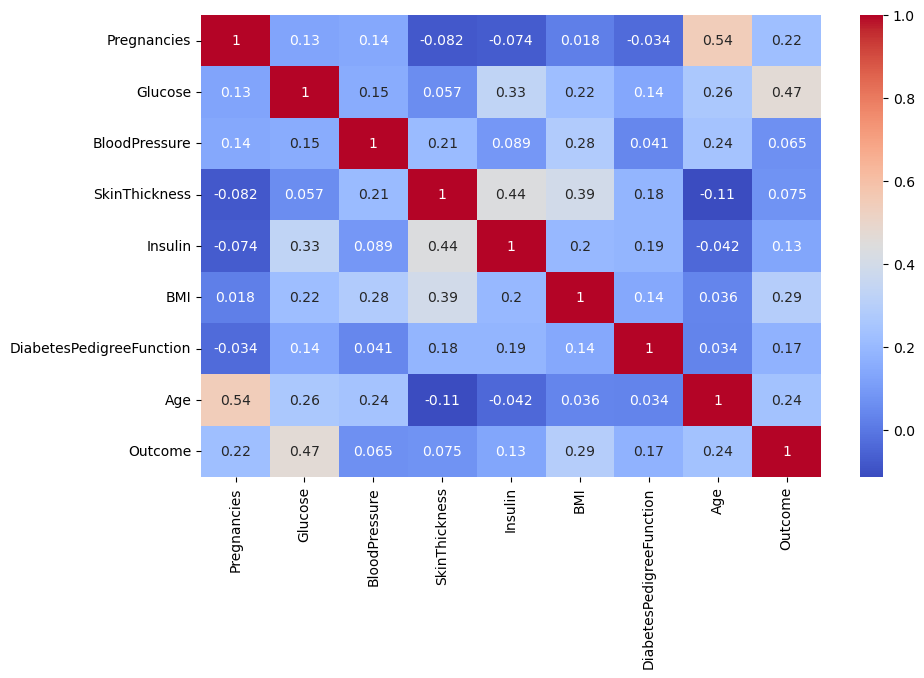

In [111]:
#Visualize the correlation between variables

plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm")
plt.show()

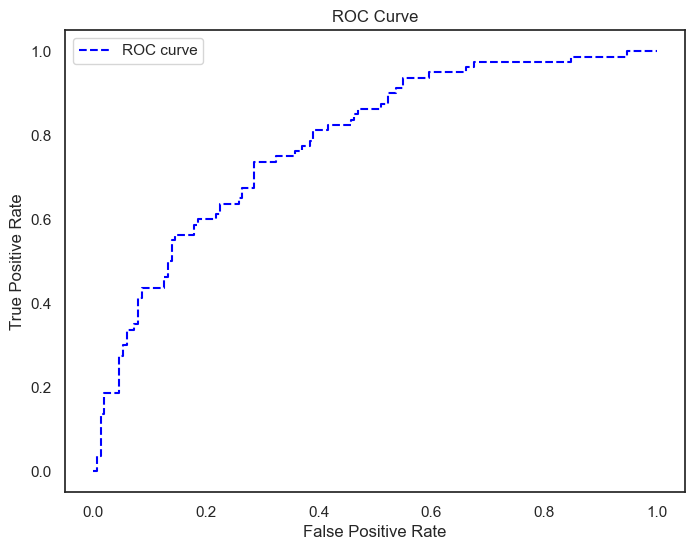

In [121]:
# Reciever Operating Characteristics(ROC) curve to check the performance of the model
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', color='blue', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
